In [4]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.random.seed(0)

In [2]:
# from sympy import *
# x, y = symbols('x y', real=False)
# w=diff( x**2 + y**2, y,evaluate=True)
# print(diff( x**2 + y**2, y))
#3*y**2
#diff( x**2 + y**3, y).subs({x:3, y:1})

In [8]:
def Data(pinit_val,qinit_val):
    def hamilton(t,r):
        p, q =r 
        #H = p**2 + q**2 # spring hamiltonian (linear oscillator)
        pdot= -2*q  
        qdot=2*p
        return pdot,qdot
    
    ll=108
    sol=integrate.solve_ivp(hamilton,(0,18),(pinit_val,qinit_val),t_eval=np.linspace(0,18,ll))
    p = sol.y[0] + (np.random.uniform(0,0.6,ll))
    q = sol.y[1] + (np.random.uniform(0,0.6,ll))
    return p,q

    

In [9]:
x,y=Data(1,1)

In [21]:
# print(x[2])
# x[1]+dH_dq[1]

for i in range (len(x)-1):
    print(x[i]-x[i+1])

0.3481567945817676
0.33207697485365495
0.32750704321009216
0.5591366691752888
0.20712388037783902
0.5885223536387887
-0.2347307993229365
0.2884274855439636
-0.6898153285330098
-0.19366611620677027
-0.15425138427094853
-0.9122786648671439
-0.3255697147925112
-0.10024762382417118
-0.2500074525839395
-0.31493934837536686
0.32191205203090756
0.07207497216167691
0.18467805555535888
0.4448160679224922
0.4133931890980619
0.5786108354815238
0.22935220249486477
0.1500347464751487
0.6298264326040607
-0.21313356779210402
0.10093535005860388
-0.624177552298128
-0.19397001500366395
-0.5565725795598943
-0.24354402594545332
-0.41500638985047755
-0.5598635592846422
-0.1502537258454848
-0.43084692868091046
0.1829922405219826
0.23850148296617557
0.260001281934098
0.9292580829544727
0.1915936667402351
0.4362317935553498
0.1605994803693686
0.6765406179000303
0.1630043512081023
0.05929061743423736
-0.13043468969262206
-0.8627698833741384
-0.2579902953441407
-0.5361276762311712
-0.16526200353671922
-0.59791

In [11]:
tfp= tf.constant(x)
tfq= tf.constant(y)
with tf.GradientTape() as g:
    g.watch([tfp,tfq])
    H= tfp**2+ tfq**2
    dH_dp,dH_dq = g.gradient(H, [tfp,tfq])
    print(dH_dp,'\n',dH_dq)

tf.Tensor(
[ 2.38402058  1.68770699  1.02355304  0.36853896 -0.74973438 -1.16398214
 -2.34102685 -1.87156525 -2.44842022 -1.06878957 -0.68145733 -0.37295457
  1.45160276  2.10274219  2.30323744  2.80325235  3.43313104  2.78930694
  2.645157    2.27580088  1.38616875  0.55938237 -0.5978393  -1.05654371
 -1.3566132  -2.61626606 -2.18999893 -2.39186963 -1.14351452 -0.75557449
  0.35757067  0.84465872  1.6746715   2.79439862  3.09490607  3.95659992
  3.59061544  3.11361248  2.59360991  0.73509375  0.35190641 -0.52055717
 -0.84175613 -2.19483737 -2.52084607 -2.63942731 -2.37855793 -0.65301816
 -0.13703757  0.93521778  1.26574179  2.4615708   2.46737807  3.33881666
  3.98497426  3.60292847  2.41125994  2.38852877  0.60281185  0.51790664
 -0.36762903 -1.24658788 -1.91060091 -1.77902778 -2.3205702  -1.19882122
 -0.77121411 -0.62241272  0.72371315  1.39597262  3.1711347   3.11806953
  3.4056723   3.52710912  2.84329743  1.93544283  1.93050278  0.23890496
 -0.31019008 -1.48577736 -2.27123341 -1.

In [4]:

coord_list=np.array([])
for i in range (len(x)):
    a=(x[i],y[i])
    coord_list=np.append(coord_list,a)
   
last_coord_list = np.reshape(coord_list,(len(x),2))
last_coord_list
np.random.shuffle(last_coord_list)

array([[ 1.32928810e+00,  1.13384898e+00],
       [ 1.04288878e+00,  1.84593589e+00],
       [ 5.20444279e-01,  1.67402748e+00],
       [ 1.25703145e-02,  1.88670001e+00],
       [-4.98063418e-01,  1.61754165e+00],
       [-7.18044997e-01,  1.06099600e+00],
       [-1.07208632e+00,  9.55864833e-01],
       [-8.79546926e-01,  2.38487622e-01],
       [-7.57394022e-01,  6.23159983e-02],
       [-8.76004866e-01, -5.32418396e-01],
       [-2.78186610e-01, -6.68270553e-01],
       [ 1.55506303e-03, -9.63239097e-01],
       [ 4.98205765e-01, -9.70217827e-01],
       [ 1.16821560e+00, -9.74286766e-01],
       [ 1.04187537e+00, -4.27481746e-01],
       [ 1.32591657e+00, -2.28180001e-01],
       [ 1.41777613e+00,  9.46939881e-02],
       [ 1.87882775e+00,  6.77158663e-01],
       [ 1.66499050e+00,  7.62812450e-01],
       [ 1.40509645e+00,  1.28595009e+00],
       [ 1.05575339e+00,  1.73041102e+00],
       [ 4.81041069e-01,  1.58836471e+00],
       [-1.88609257e-01,  1.70676539e+00],
       [-4.

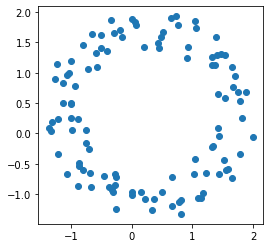

In [5]:
plt.plot(x,y,'o')
plt.axis('scaled');

In [9]:
train_coord,test_coord=np.split(last_coord_list,[86])
#print(len(train_coord))
#len(test_coord)

In [8]:
#def loss():
    
    

In [ ]:
def HNN():

In [10]:
myModel=keras.models.Sequential()
myModel.add(keras.layers.Flatten(input_shape=[2]))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(1, activation="softmax"))

In [11]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 200)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 41,001
Trainable params: 41,001
Non-trainable params: 0
_________________________________________________________________


In [12]:
#tf.keras.losses.mean_absolute_error
myModel.compile(loss="mean_absolute_error",
                optimizer="Adam",
                metrics=["accuracy"])

In [14]:
y_train=np.array([])
for i in range (len(train_coord)):
    y_train=np.append(y_train,(train_coord[i][0]**2+train_coord[i][1]**2))

In [15]:
trainedModel=myModel.fit(train_coord, y_train, epochs=30)
                        #,validation_data=(X_valid, y_valid))

Epoch 1/30
3/3 [==============================] - 0s 890us/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 0s 838us/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 4/30
3/3 [==============================] - 0s 1ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 5/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 7/30
3/3 [==============================] - 0s 3ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 8/30
3/3 [==============================] - 0s 5ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 9/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 10/30
3/3 [==============================] - 0s 3ms/step - loss: 1.2572 - accuracy: 0.0000

<AxesSubplot:>

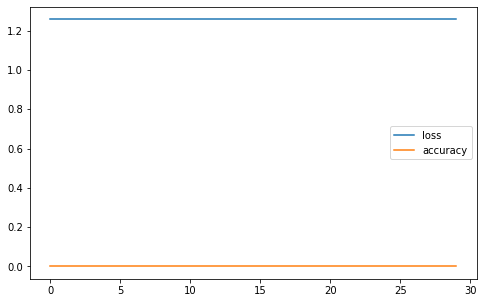

In [16]:
import pandas as pd
pd.DataFrame(trainedModel.history).plot(figsize=(8, 5))


In [19]:
y_test=np.array([])
for i in range (len(test_coord)):
    y_test=np.append(y_test,(test_coord[i][0]**2+test_coord[i][1]**2))

In [20]:
myModel.evaluate(test_coord, y_test)

1/1 [==============================] - 0s 873us/step - loss: 1.4089 - accuracy: 0.0000e+00


[1.4089382886886597, 0.0]

In [ ]:

def hamilton(t,r):
    p, q =r 
    #H = p**2 + q**2 # spring hamiltonian (linear oscillator)
    pdot= -2*q  
    qdot=2*p
    return pdot,qdot
    
ll=108
sol=integrate.solve_ivp(hamilton,(0,18),(pinit_val,qinit_val),t_eval=np.linspace(0,18,ll))
p = sol.y[0] + (np.random.uniform(0,0.6,ll))
q = sol.y[1] + (np.random.uniform(0,0.6,ll))
return p,q


In [18]:
a=np.array([])
a=np.append(a,[1,2,3])

In [19]:
a

array([1., 2., 3.])